<a href="https://colab.research.google.com/github/AnandKhandekar/Introduction-to-PyMC3/blob/master/Intro_to_PyMC3_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
[GitHub Repo](https://github.com/SimonOuellette35/Introduction_to_PyMC3/blob/master/Exercise1/Exercise1.ipynb)

[YouTube Talk](https://www.youtube.com/watch?v=j5QyTDUww6U&t=1752s)


***
This notebook intends to explain the very SYNTAX of PyMC3 using simple and progressive exercises as suggested in the TALK mentioned above by Simon Ouellette.


# **Exercise 1 : Fitting a Normal Distribution**

* Produce an artificial dataset, drawn from a random distribution

* We are going to fit a very simple model tp the data to ESTIMATE the mean and the Standar deviation.

* We will show the effect of **overly restricted PRIORS ( regularization effect)**, and how more **data can help CANCEL that effect.**

In [4]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 3.5MB/s 
     |████████████████████████████████| 4.1MB 25.4MB/s 
     |████████████████████████████████| 327kB 38.4MB/s 
     |████████████████████████████████| 911kB 3.4MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [0]:

%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

Generate artificial DATA. we draw 2000 samples form this NORMAL distributionwith mean $\mu$= 0.5 and a SD $\sigma$ = 0.35

In [0]:
# 1. generate the artificial dataset. The distribution is mu=0.5, sd=0.35
obs_y = np.random.normal(0.5, 0.35, 1000)



```
with pm.Model() as exercise1:
```
we will always follow this template that instantiates a PyMC3 model as some relevant variable name, in theis case exercise 1. And everything that is declared within that closure will be associated with that model.

when we start designing a Bayesian model, w always start from designing the probabilit distribution we are interested in. Here the probability distribution of the data is assumed to be a NORMAL. We therefore instantiate 

```
y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)
```
give it some sting attacnhed name 'y' and then we parametrize the mean $\mu$ and the sd $\sigma$ and finally we have to be able to tell PyMC3 what data it is going to use to estimate the parameters of our model This is done by the "observed  = the variable that contains your DATA" argument.

We have 2 parameters that we are trying to ESTIMATE, the $\mu$ and the sd $\sigma$



```
stdev = pm.HalfNormal('stdev', sd=1.)
mu = pm.Normal('mu', mu=0.0, sd=1.)
```

note that the sd cannot be negative and hence w have used the HalfNormal distrbution. We are going to set some prior beliefs about what range do we belive that the true value  they posses. So I belive the mu follows a normal with SD of 1. **My beliefs ( priors)are defined.** 

Next , we will run the **infernce algorithm**


```
trace = pm. sample(1000)
```





 



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1332.10it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/

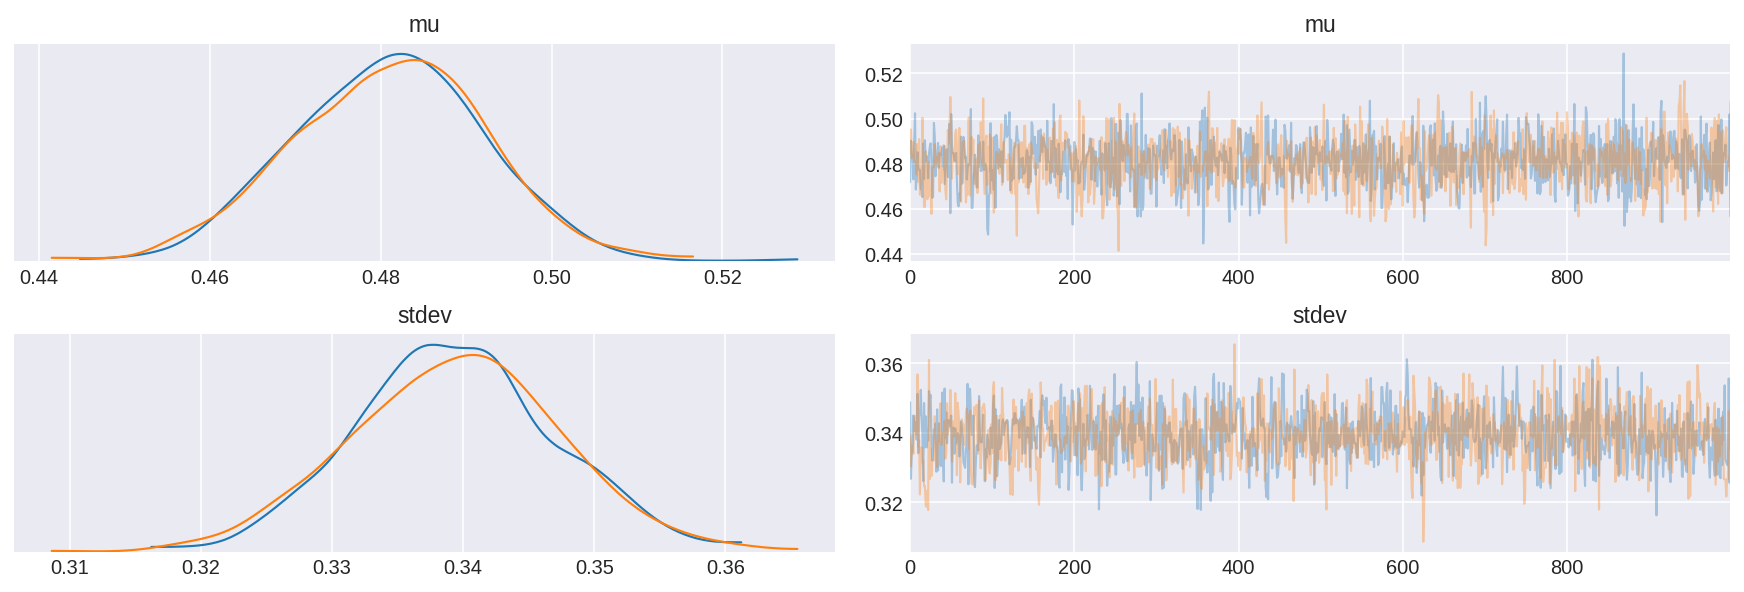

In [3]:
# 2. model that data with a simple Bayesian model.
with pm.Model() as exercise1:

    stdev = pm.HalfNormal('stdev', sd=1.)
    mu = pm.Normal('mu', mu=0.0, sd=1.)

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

* these grahs show the beliefs of the models about the valuees of mu and sd. 
* notice that the expectation of the mu ( peak) is around 0.5 ( a littel bit less abut around) as it should be since we set it at 0.5. Thus there is a littel bit of uncertainty. Also the sd is around 0.35




## **Restrictive PRIOR beliefs**
Now, let us see if we have much less DATA to start with. say 100 samples in obs_ y  and we set the sd of our prior belifs for mu and sd as 0.05 in both. We know that this is wrong , since we generated the data with a mu of 0.5 and sd of .35. these values are far form zero. 

We will now see a bit of the **regularization effect**

We run the **same** code as above agina only by changing the data points to 100 and the sd to 0.05.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1337.32it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/

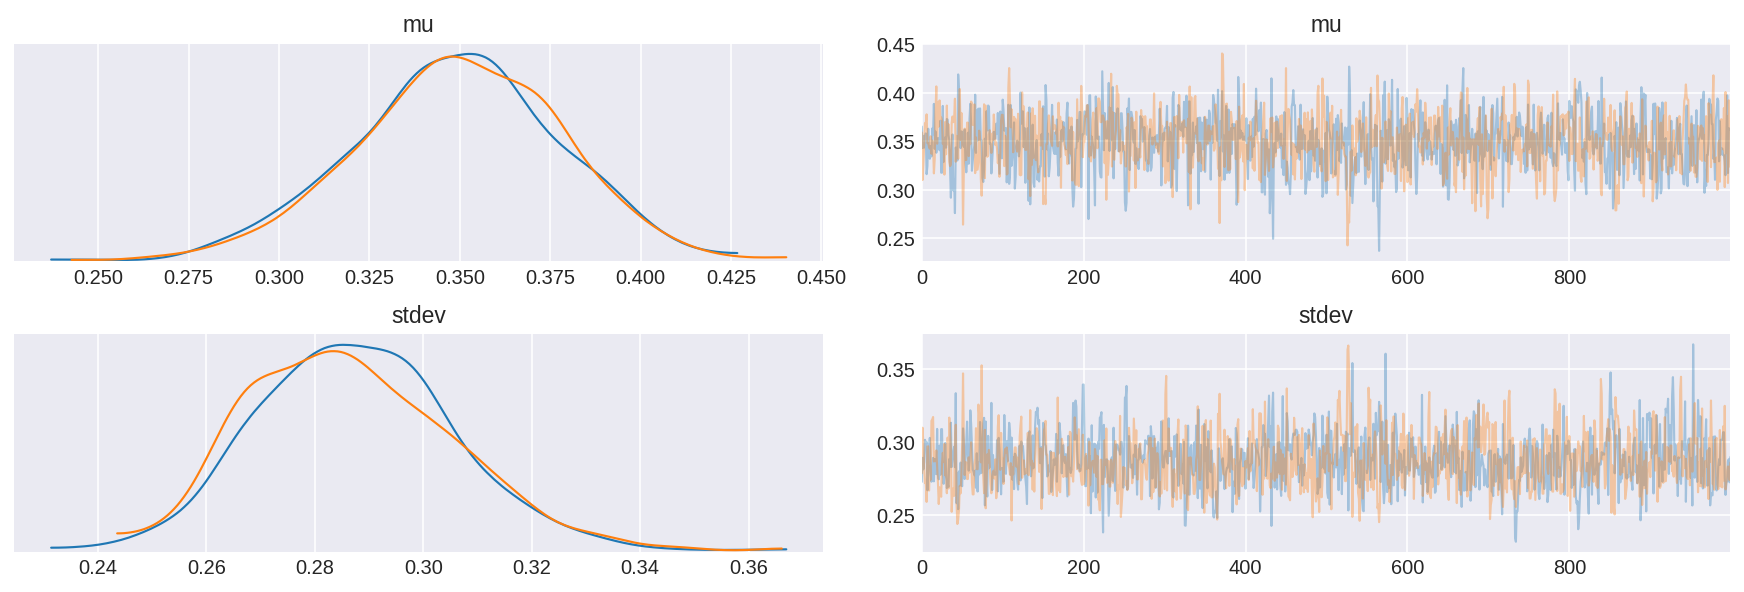

In [4]:
obs_y = np.random.normal(0.5, 0.35, 100)  # notice that we now have ONLY 100 data points in obs_y

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev', sd=0.05)  # notice that the sd is 0.05
    mu = pm.Normal('mu', mu=0.0, sd=0.05)  #  notice the sd is not 1 but is 0.05

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

* note that the trace plot on th eleft fo mu shows the peak at around 0.35 and the peak for sd is seen around 0.29. 
* this happenned since there was not enough EVIDENCE form the DATA to go that much further from our prior beliefs.

*  It keeps it close to  zero,  regularizes. This can be seen as a counter balance and can take care of outliers in the data. 



**Finally lets keep the restriction of sd on the priors as 0.05, but let us go back to increasing the number of data points to 2000**

Here we run the entire model AGAIN with the numbe of obs_y = 2000.

*  notice that the estimates will adjsut themselves, since enough data has been OBSERVED. i.e the MODEL can update itself to the true values  if it sees the data enough nmberr of times


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 909.29it/s]
The acceptance probability does not match the target. It is 0.9177959664936586, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument bac

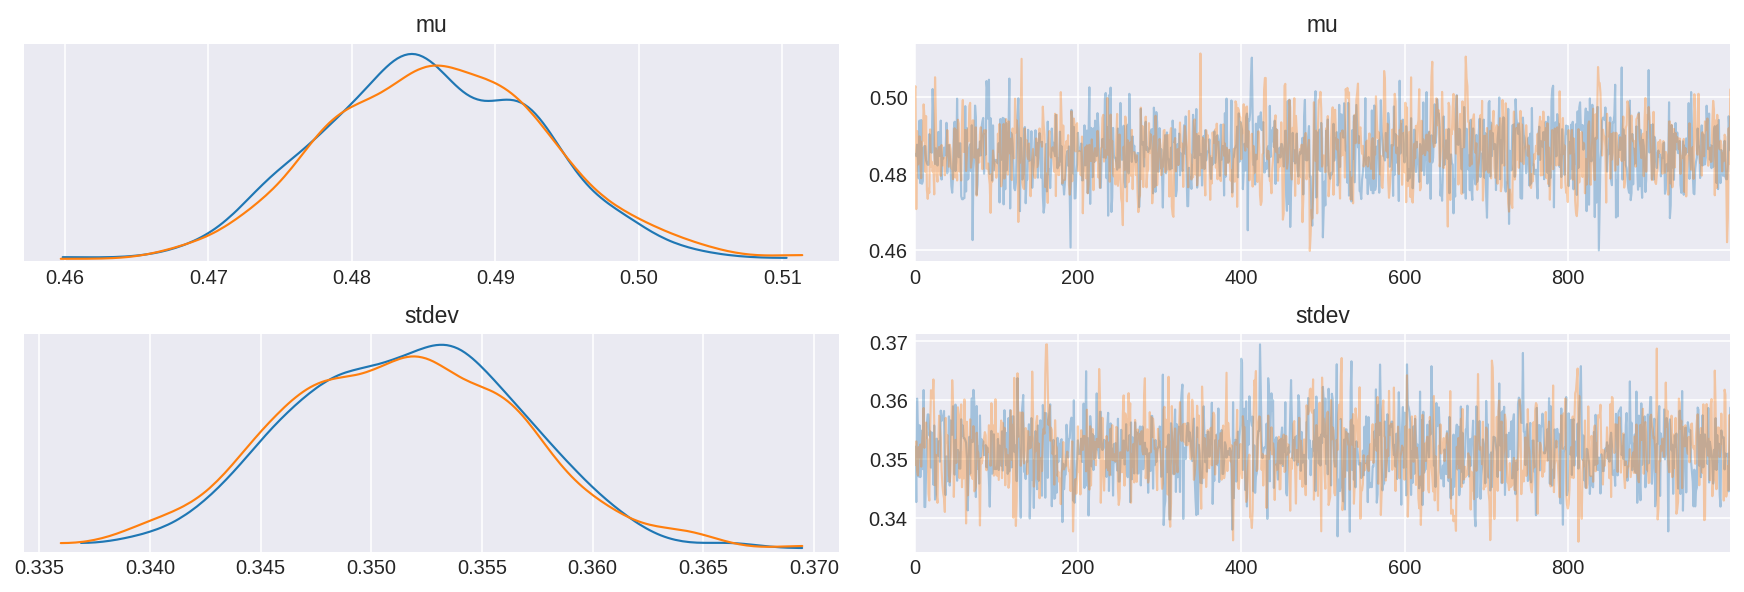

In [5]:
obs_y = np.random.normal(0.5, 0.35, 2000)  # notice that we now have gone back to the original 2000 number of points

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev', sd=0.05)  # notice that the sd is 0.05
    mu = pm.Normal('mu', mu=0.0, sd=0.05)  #  notice the sd is not 1 but is 0.05

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(1000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

* voila !!!

> the estimated mean is around 0.5 ( expectted value) and the stimated sd is around 0.35  even if the priors were restricted.  This happpend because the DATA  pointd it out. 